# Part II - (Loan Data from Prosper - Data Analysis)
## by (Nora M)

## Investigation Overview


> In this investigation, my goal is to identify the elements that can be utilized to forecast credit default. in addition to highlighting what variables may affect the Prosper's rating


## Dataset Overview

> This data set contains more than 100K loans with 80+ variables on each loan. Additionally the data set includes loan amount, interest rate, loan status, borrower income, etc.

In [66]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [67]:
df = pd.read_csv('prosperLoanData.csv')

### Data Wrangling 

In [68]:
targeted_columns = ['Term', 'LoanStatus', 'BorrowerRate', 'ProsperRating (Alpha)', 'ListingCategory (numeric)', 'EmploymentStatus','DelinquenciesLast7Years', 'StatedMonthlyIncome', 'TotalProsperLoans', 'LoanOriginalAmount','LoanOriginationDate', 'Recommendations', 'Investors']
targeted_df = df[targeted_columns]
targeted_df = targeted_df.dropna(subset=['ProsperRating (Alpha)']).reset_index()
targeted_df['LoanOriginationDate'] = pd.to_datetime(targeted_df['LoanOriginationDate'])
targeted_df['TotalProsperLoans'] = targeted_df['TotalProsperLoans'].fillna(0)

## (Loan status)

The majority of the loans in the data set are current loans.
For Completed loans, defaulted loans are a minority, but charged-off loans nevertheless constitute a significant portion.
Past-due loans are classified into numerous categories based on the length of the payment delay.

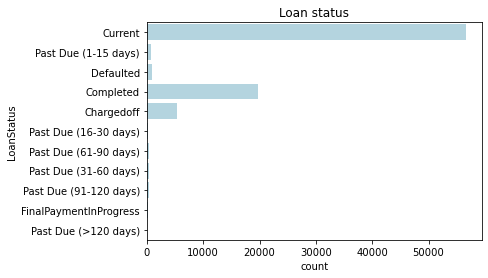

In [69]:
sb.countplot(data = targeted_df, y = 'LoanStatus', color = 'lightblue').set(title ="Loan status");

## (Stated monthly income)

The distribution of the monthly income has noticeable right skew & mode is about 5000.

In [70]:
def dynamicname (string):

    return ''.join([x if x.islower() else f" {x}" for x in string])

def histo(df, xVar, interval,figsize=[14,6], title= ''):
    
    bins=np.arange(df[xVar].min(),df[xVar].max()+interval, interval)
    
    df[xVar].hist(bins=bins, grid = False , fill = True, color = '#CBC3E3', figsize=figsize);
    
    xVar=dynamicname(xVar).replace("_", '')
    
    plt.title(f'distribution of {xVar}{title}'.title(), fontsize = 14, weight='bold')
    
    plt.xlabel(xVar.title(), fontsize = 10, weight='bold')
    
    plt.ylabel('Frequency'.title(), fontsize = 10, weight='bold')


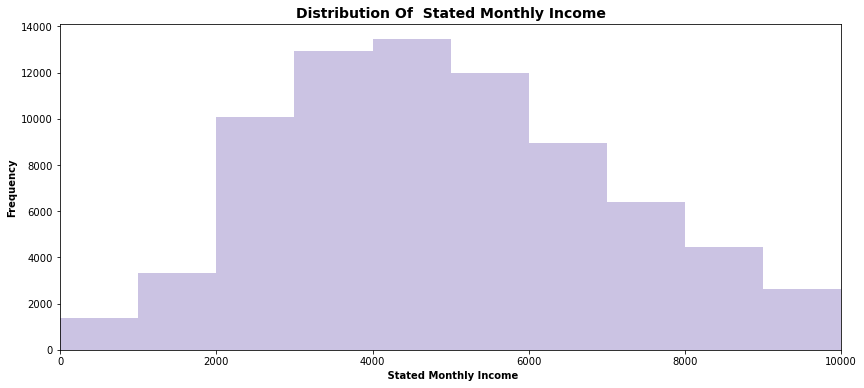

In [71]:
histo(targeted_df,'StatedMonthlyIncome',1000);
plt.xlim(0,10000);

## (Employment status)

Usually, borrowers are employed

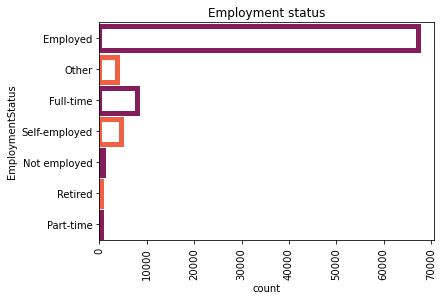

In [72]:
plt.xticks(rotation = 90);
sb.countplot(y ='EmploymentStatus', data = targeted_df ,color='#A9DFBF', facecolor=(0, 0, 0, 0),
                   linewidth=5,
                   edgecolor=sb.color_palette('rocket', 2)).set(title = "Employment status");


In [73]:
state = (targeted_df['LoanStatus'] == 'Completed') | (targeted_df['LoanStatus'] == 'Defaulted') |\
                  (targeted_df['LoanStatus'] == 'Chargedoff')
targeted_df = targeted_df[state]

def change_to_defaulted(row):
    if row['LoanStatus'] == 'Chargedoff':
        return 'Defaulted'
    else:
        return row['LoanStatus']
    
targeted_df['LoanStatus'] = targeted_df.apply(change_to_defaulted, axis=1)
targeted_df['LoanStatus'].value_counts()

Completed    19664
Defaulted     6341
Name: LoanStatus, dtype: int64

In [74]:
types = {1: 'Debt Consolidation', 2: 'Home Improvement', 3: 'Business', 6: 'Auto', 7: 'Other'}
def reduce_types(row):
    loan_types = row['ListingCategory (numeric)']
    if  loan_types in types:
        return types[loan_types]
    else:
        return types[7]
    
targeted_df['ListingCategory (numeric)'] = targeted_df.apply(reduce_types, axis=1)
targeted_df['ListingCategory (numeric)'].value_counts()

Debt Consolidation    12740
Other                  7083
Home Improvement       2612
Business               2366
Auto                   1204
Name: ListingCategory (numeric), dtype: int64

## (State & Prosper Rating:)

Most frequent rating(defaulted loans): D. 
Most frequent rating(completed loans): D.

In [75]:
creditrating = ["AA", "A", "B", "C","D","E", "HR"]

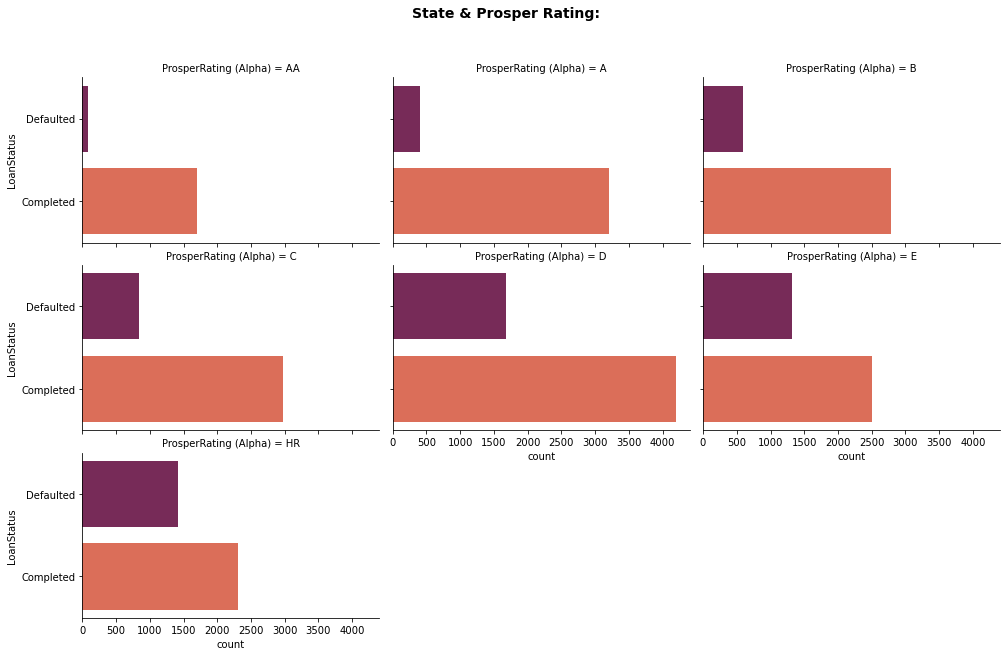

In [85]:
graphs=sb.catplot(y = 'LoanStatus', col = 'ProsperRating (Alpha)',
              data = targeted_df, kind = 'count', palette = 'rocket', col_wrap = 3, col_order=creditrating);


plt.suptitle("State & Prosper Rating:".title(), y = 1.1, fontsize = 14, weight = "bold");


graphs.fig.set_size_inches(14, 8);

## (Listing types/categories)

The debt Consolidation was the most frequent.

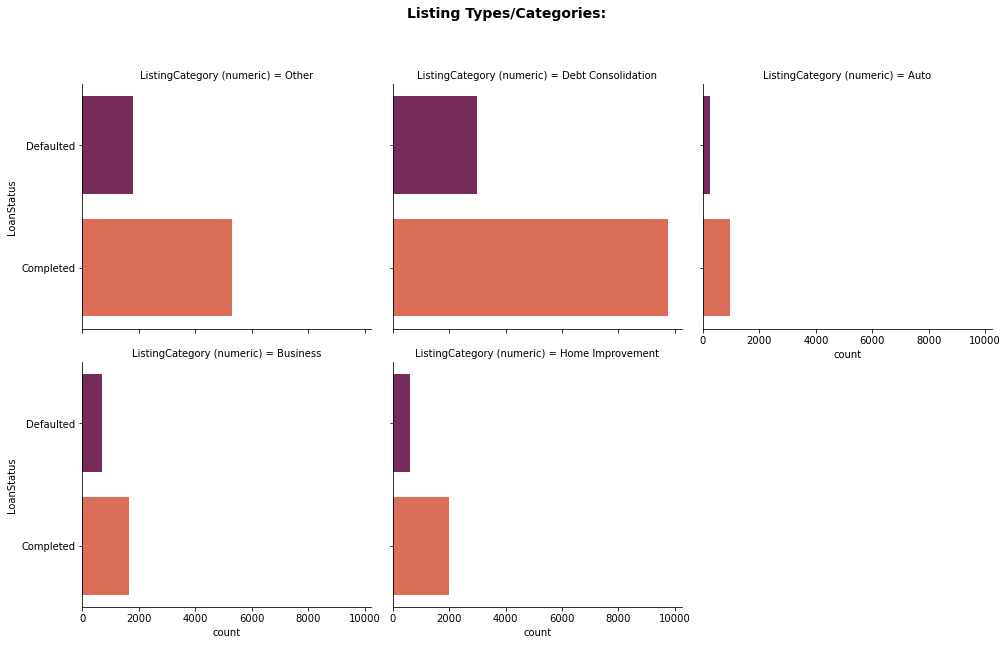

In [84]:
graphh=sb.catplot(y = 'LoanStatus', col = 'ListingCategory (numeric)',
              data = targeted_df, kind = 'count', palette = 'rocket', col_wrap = 3);
plt.suptitle("Listing types/categories:".title(), y = 1.1, fontsize = 14, weight = "bold");


graphh.fig.set_size_inches(14, 8);

## (Status & Amount)

Defaulted credits are smaller than completed credits.

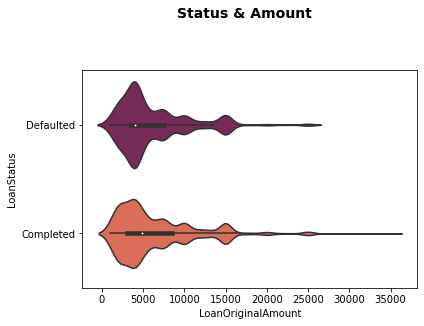

In [86]:
sb.violinplot(data = targeted_df, y = 'LoanStatus', x = 'LoanOriginalAmount', palette = 'rocket');
plt.suptitle("Status & Amount".title(), y = 1.1, fontsize = 14, weight = "bold");


## (Rating & Employment Status)

When the rating is lower, most people are not employed, self-employed, retired or only have a part-Time.

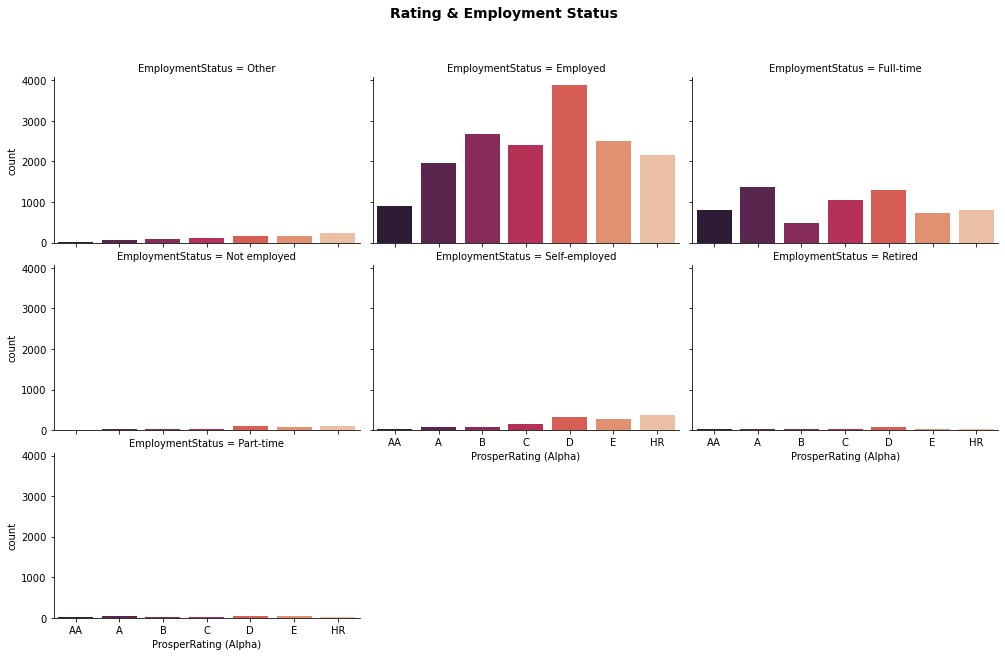

In [87]:
graph=sb.catplot(x = 'ProsperRating (Alpha)', col = 'EmploymentStatus',
              data = targeted_df, kind = 'count', palette = 'rocket', col_wrap = 3, order=creditrating);
plt.suptitle("Rating & Employment Status".title(), y = 1.1, fontsize = 14, weight = "bold");

graph.fig.set_size_inches(14, 8);


## (Loan Rating, Amount and Status)

Defaulted credits > completed. 
Individuals that has low Prosper rating are the source of defaulted credits.

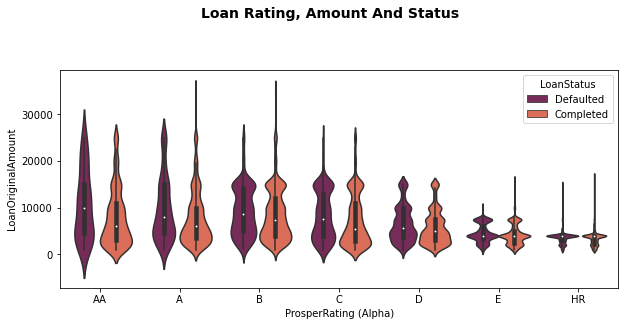

In [88]:
plt.figure(figsize = [10, 4])
sb.violinplot(data=targeted_df, x='ProsperRating (Alpha)', y='LoanOriginalAmount', hue='LoanStatus',  palette = 'rocket', order=creditrating);
plt.suptitle("Loan Rating, Amount and Status".title(), y = 1.1, fontsize = 14, weight = "bold");


## (Credit Category, Rating, Outcome, and Their Relationship:)

There is more fluctuation in the second graph Default rates in different categories are quite similar

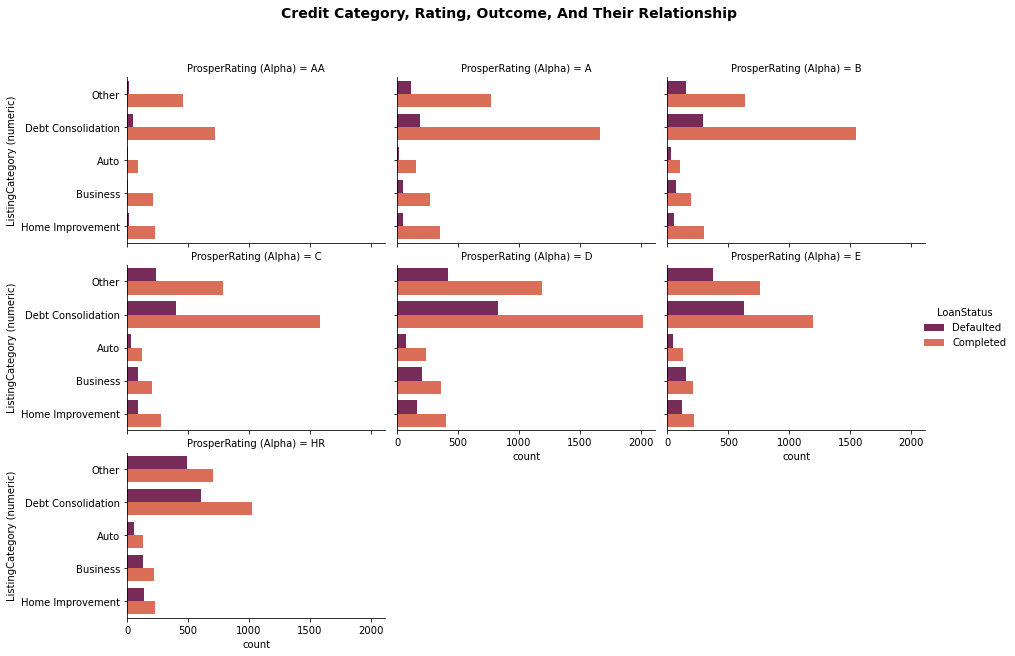

In [89]:
graphf=sb.catplot(y = 'ListingCategory (numeric)', hue = 'LoanStatus', col = 'ProsperRating (Alpha)',
              data = targeted_df, kind = 'count', palette = 'rocket', col_order=creditrating, col_wrap = 3);
plt.suptitle("Credit Category, Rating, Outcome, and Their Relationship".title(), y = 1.1, fontsize = 14, weight = "bold");


graphf.fig.set_size_inches(14, 8);

## (Amount, Listing, Category, Status, and Their Relationship:)

There is more fluctuation in the second graph Default rates in different categories are quite similar

The majority of business & home improvemrnt do not have equal means. While the business category has the larger amount.

>**Generate Slideshow**: Once you're ready to generate your slideshow, use the `jupyter nbconvert` command to generate the HTML slide show. . From the terminal or command line, use the following expression.

In [82]:
!jupyter nbconvert Part_II_slide_deck_template.ipynb --to slides --post serve  --no-input --no-prompt

[NbConvertApp] Converting notebook Part_II_slide_deck_template.ipynb to slides
[NbConvertApp] Writing 798253 bytes to Part_II_slide_deck_template.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Serving your slides at http://127.0.0.1:8000/Part_II_slide_deck_template.slides.html
Use Control-C to stop this server
^C

Interrupted


> This should open a tab in your web browser where you can scroll through your presentation. Sub-slides can be accessed by pressing 'down' when viewing its parent slide. Make sure you remove all of the quote-formatted guide notes like this one before you finish your presentation! At last, you can stop the Kernel. 